<a href="https://colab.research.google.com/github/Ruswantomo/Posttest-1_Web_C2_Ruswantomo/blob/main/Unsupervised_C2_K2_PADATMIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Unsupervised**

Analisis Menggunakan STRUKTUR CRISP-DM

<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

##**Business Understanding**

Sumber dataset : https://www.kaggle.com/datasets/dell4010/wine-dataset

**Data Mining Goals**

Analisis pada wine ini dilakukan untuk:
1. Mengelompokkan setiap bahan yang terdapat pada wine termasuk kedalam apa saja.
2. Memberikan pemahaman kepada penjual wine di balik pembuatan wine dan menyelaraskan produk mereka untuk memenuhi kebutuhan dan keinginan konsumen.
3. Memberikan wawasan tentang lingkup mana yang harus diperhatikan oleh penjual wine.
4. Memberikan petunjuk kepada pembuat wine tentang kemungkinan, preferensi, dan keinginan konsumen untuk membeli wine dengan campuran fisiko-kimia tertentu.
5. Akan memberikan keuntungan bagi produsen kepada kompetitor lain.


Terdapat 13 fitur pada dataset, yaitu:

1. fixed_acidity
2. volatile_acidity
3. citric_acid
4. residual_sugar
5. chlorides
6. free_sulfur_dioxide
7. total_sulphur_dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality
13. style (white, red)

**Tujuan Penggunaan Data Mining**

Untuk memodelkan struktur data pada dataset wine sehingga dapat mempelajari data-data tersebut lebih lanjut lagi.


Tujuan data mining dari dataset "Wine Dataset" adalah untuk mengekstraksi pola, tren, dan informasi yang bermanfaat dari data pembuatan wiine dan tren penjualan produk kepada konsumen.

##**Data Understanding**

**Persiapan Data**

In [ ]:
# Untuk tabulasi dan analisis
import pandas as pd

# Untuk kalkulasi
import numpy as np
import random as rd
from math import sqrt
from matplotlib import pyplot as plt

# Untuk visualisasi
import seaborn as sns
import plotly.express as px

In [ ]:
# Fungsi untuk melihat persentase data terisi dan kosong
def null_ratio(df, limit=-1):
  percent_missing = df.isnull().sum() * 100 / len(df2)
  df_result = pd.DataFrame({
      "filled":df.notnull().sum(),
      "N null":df.isna().sum(),
      "null_ratio(%)":percent_missing,
  })
  nr = df_result.sort_values("null_ratio(%)",ascending=False)
  return nr[nr["null_ratio(%)"] > limit]

####Collect Initial Data

In [ ]:
#Collect initial data
df2 = pd.read_csv('https://raw.githubusercontent.com/arntka110/dataset-c2-k2/main/wine_dataset.csv')

In [ ]:
df2

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


####Describe Data

1. Describe column
2. Describe data secara keseluruhan

**Describe Column**

Dataset ini memiliki beberapa kolom atau kriteria-kriteria yang akan menentukan bagaimana kualitas wine selama pembuatannya, kolom-kolom yang ada diantaranya:
1. **fixed_acidity**, merupakan tingkat keasaman pada wine secara tetap
2. **volatile_acidity**, merupakan tingkat keasaman pada wine yang mudah menguap
3. **citric_acid**, merupakan tingkat asam sitrat pada wine
4. **residual_sugar**, merupakan sisa gula yang ada saat proses pembuatan wine
5. **chlorides**, merupakan tingkat klorida pada wine
6. **free_sulfur_dioxide**, seberapa tinggi tingkat belerang dioksida bebas yang dihasilkan pada wine
7. **total_sulphur_dioxide**, total sulfur dioksida pada wine
8. **density**, tingkat kerapatan volume pada wine
9. **pH**, merupakan tingkat derajat keasaman atau kebasaan pada wine
10. **sulphates**, tingkat asam sulfat yang dihasilkan
11. **alcohol**, tingkat alkohol yang digunakan saat pembuatan wine
12. **quality**, seberapa tinggi kualitas produk yang dihasilkan
13. **style (white, red)**, jenis wine yang dibuat

**Describe Data Secara Keseluruhan**

In [ ]:
df2

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
# Menampilkan data 5 baris pertama
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
# Menampilkan data 5 baris terakhir
df2.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [ ]:
# Mlihat lebih jelas jumlah kolom dan baris
df2.shape

#Pada data ini terdapat 6947 baris dan 13 kolom

(6497, 13)

In [ ]:
# Melihat tipe data pada setiap fitur
df2.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    object
dtype: object

In [ ]:
# Cek statistik deskriptif secara rinci
df2.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# Menampilkan info dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


###Explore Data

In [ ]:
#Tampilkan data
df2

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


####Visualisasi Comparison

<Axes: xlabel='style', ylabel='count'>

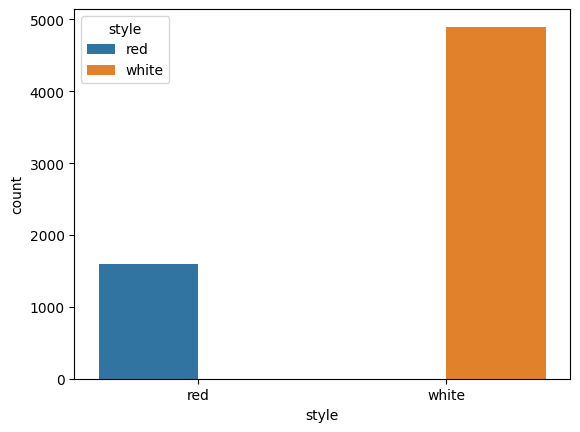

In [ ]:
# Visualisasi perbandingan wine merah dan wine putih
sns.countplot(data = df2,x="style", hue="style")

Dari data yang ditampilkan, wine putih lebih banyak diproduksi dibandingkan dengan wine merah. Sehingga dapat dikatakan data tidak seimbang.

####Visualisasi Distribution

In [ ]:
# Visualisasi tingkat pH yang dihasilkan pada wine 
px.histogram(df2,x="pH")

Dari data yang ditampilkan, pH dengan total paling banyak yaitu dengan total 200 memiliki nilai 3.16. Sedangkan pH dengan nilai 4, totalnya hanya 2.

In [ ]:
# Visualisasi tingkat kualitas yang dihasilkan pada wine 
px.histogram(df2,x="quality")

Dari data yang ditampilkan, nilai kualitas paling tinggi berada pada angka 8 dengan total 193. Sedangkan nilai kulitas = 6 memiliki total yang lebih banyak yaitu 2836.

In [ ]:
# Visualisasi perbandingan tingkat kualitas antara wine merah dan wine putih
px.histogram(df2,x="quality", color="style")

Pada data yang ditampilkan, kedua wine memiliki tingkat kualitas yang sama yaitu 8. Namun, total untuk wine putih lebih banyak dibandingkan wine merah, yaitu wine putih dengan total 175 dan wine merah dengan total 18.

In [ ]:
# Visualisasi dalam bentuk boxplot pada tingkat pH
px.box(df2, x="pH")

In [ ]:
# Visualisasi dalam bentuk boxplot pada tingkat kualitas wine
px.box(df2, x="quality")

####Visualisasi Composition

In [ ]:
# Visualisai perbandingan wine putih dan wine merah
px.pie(df2, names="style")

Pada data yang ditampilkan dapat dilihat bahwa wine putih memiliki nilai 75.4% sedangkan wine merah memiliki nilai 24.6%. Sehingga dapat diasumsikan bahwa wine putih lebih mendominasi/lebih banyak disukai oleh konsumen dibandingkan dengan wine merah.

##**Data Preperation**

###Select Data

Select data adalah bagian menentukan dataset yang akan digunakan apabila terdapat banyak dataset-nya. **Data utama** yang digunakan bersumber dari tabel wine.csv

###Cleaning Data

Tahapan cleaning data :
1. Datatype
2. Missing value
3. Outlier handling

####Datatype

In [ ]:
# Tampilkan data
df2

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
# Cek datatype
df2.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    object
dtype: object

In [ ]:
# Atau dapat menggunakan sintaks df2.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Dapat dilihat bahwa tipe data yang digunakan adalah float, int, dan object.

In [ ]:
# Mengambil sebagian data dari dataset awal

df2 = df2.iloc[0:3248, :]

In [ ]:
df2

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.60,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,7.3,0.19,0.49,15.55,0.058,50.0,134.0,0.9998,3.42,0.36,9.1,7,white
3244,7.5,0.24,0.49,9.40,0.048,50.0,149.0,0.9962,3.17,0.59,10.5,7,white
3245,6.4,0.22,0.49,7.50,0.054,42.0,151.0,0.9948,3.27,0.52,10.1,6,white
3246,7.8,0.21,0.49,1.20,0.036,20.0,99.0,0.9900,3.05,0.28,12.1,7,white


####Handling Missing Value

In [ ]:
# Cek data yang kosong
df2.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [ ]:
df2.isnull().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
style                   False
dtype: bool

In [ ]:
null_ratio(df2)

,filled,N null,null_ratio(%)
fixed_acidity,3248,0,0.0
volatile_acidity,3248,0,0.0
citric_acid,3248,0,0.0
residual_sugar,3248,0,0.0
chlorides,3248,0,0.0
free_sulfur_dioxide,3248,0,0.0
total_sulfur_dioxide,3248,0,0.0
density,3248,0,0.0
pH,3248,0,0.0
sulphates,3248,0,0.0


Pada data yang ditampilkan dapat dilihat bahwa tidak terdapat data yang kosong, sehingga **Handling Missing Value tidak diperlu dilakukan.**

####Handling Duplicate Data

In [ ]:
df2[df2.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5,red
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5,red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,8.9,0.320,0.49,1.60,0.050,17.0,131.0,0.9956,3.13,0.34,9.4,5,white
3230,8.2,0.200,0.49,3.50,0.057,14.0,108.0,0.9928,3.19,0.35,11.5,6,white
3239,7.8,0.490,0.49,7.00,0.043,29.0,149.0,0.9952,3.21,0.33,10.0,5,white
3243,7.3,0.190,0.49,15.55,0.058,50.0,134.0,0.9998,3.42,0.36,9.1,7,white


In [ ]:
df2.drop_duplicates(inplace=True)

<ipython-input-64-9d235a8ba753>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2[df2.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style


Pada data diatas, terdapat data yang duplikat

####Handling Outlier

In [ ]:
df2

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.60,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.80,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,7.3,0.19,0.49,15.55,0.058,50.0,134.0,0.9998,3.42,0.36,9.1,7,white
3242,8.1,0.30,0.49,12.30,0.049,50.0,144.0,0.9971,3.09,0.57,10.2,7,white
3244,7.5,0.24,0.49,9.40,0.048,50.0,149.0,0.9962,3.17,0.59,10.5,7,white
3246,7.8,0.21,0.49,1.20,0.036,20.0,99.0,0.9900,3.05,0.28,12.1,7,white


In [ ]:
cols = df2.select_dtypes(include=['int64'])

# List untuk menyimpan hasil
results = []

for col in cols:
    q1 = df2[col].quantile(0.25)
    q3 = df2[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df2))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
quality,3.637686


In [ ]:
cols = ['quality']

# List untuk menyimpan hasil
results = []

for col in cols:
    q1 = df2[col].quantile(0.25)
    q3 = df2[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df2))*100
    if percent_outliers < 10:
      df2 = df2[~((df2[col] > upper_bound) | (df2[col] < lower_bound))]
    outliers_after = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]
    percent_outliers_after = (len(outliers_after)/len(df2))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers_after})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
quality,0.0


####Construct Data

1. Hapus kolom yang tidak digunakan
2. Ekstrak kolom-kolom yang ada

Proses ini tidak dilakukan karena tidak ada kolom yang perlu di ekstrak

In [ ]:
# Menghapus kolom yang tidak digunakan
df3 = df2.drop(columns=["quality","style"])

In [ ]:
df3

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.60,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.80,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
3241,7.3,0.19,0.49,15.55,0.058,50.0,134.0,0.9998,3.42,0.36,9.1
3242,8.1,0.30,0.49,12.30,0.049,50.0,144.0,0.9971,3.09,0.57,10.2
3244,7.5,0.24,0.49,9.40,0.048,50.0,149.0,0.9962,3.17,0.59,10.5
3246,7.8,0.21,0.49,1.20,0.036,20.0,99.0,0.9900,3.05,0.28,12.1


###Integrate Data
Proses ini tidak dilakukan karena tidak ada tabel yang perlu di join dengan tabel utama

##**Data Visualization and Analysis**

Proses ini dilakukan setelah tahap **Cleaning Data**

Pertama-tama kita dapat melihat summary terhadap statisik dataframe yang ada

Summary ini berisi rata-rata, standar deviasi, nilai max dan niali min,
quartil 1, 2 (median) , dan 3

In [ ]:
df3.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000
mean,7.658626,0.404524,0.317320,4.151095,0.067836,25.218007,95.073801,0.995534,3.258856,0.573016,10.342947
std,1.528622,0.192487,0.176509,3.930040,0.044155,16.774263,62.350920,0.002546,0.162808,0.168702,1.069379
min,4.600000,0.080000,0.000000,0.800000,0.012000,1.000000,6.000000,0.988150,2.740000,0.250000,8.400000
25%,6.700000,0.250000,0.210000,1.800000,0.044000,12.000000,38.000000,0.993620,3.150000,0.460000,9.500000
50%,7.300000,0.360000,0.320000,2.300000,0.060000,22.000000,90.000000,0.995800,3.260000,0.550000,10.100000
75%,8.300000,0.540000,0.440000,5.000000,0.080000,35.000000,143.000000,0.997380,3.370000,0.650000,11.000000
max,15.900000,1.330000,1.660000,23.500000,0.611000,131.000000,313.000000,1.003690,4.010000,2.000000,14.900000


####**Univariate Analysis**

**Distribution**

Pertama kita dapat melihat distribusi dan persebaran dari **fixed_acidity**,  **volatile_acidity**,  **citric_acid**, **residual_sugar**, **chlorides**, **free_sulfur_dioxide**, **total_sulfur_dioxide**, **density**, **pH**, **sulphates**, **alcohol**

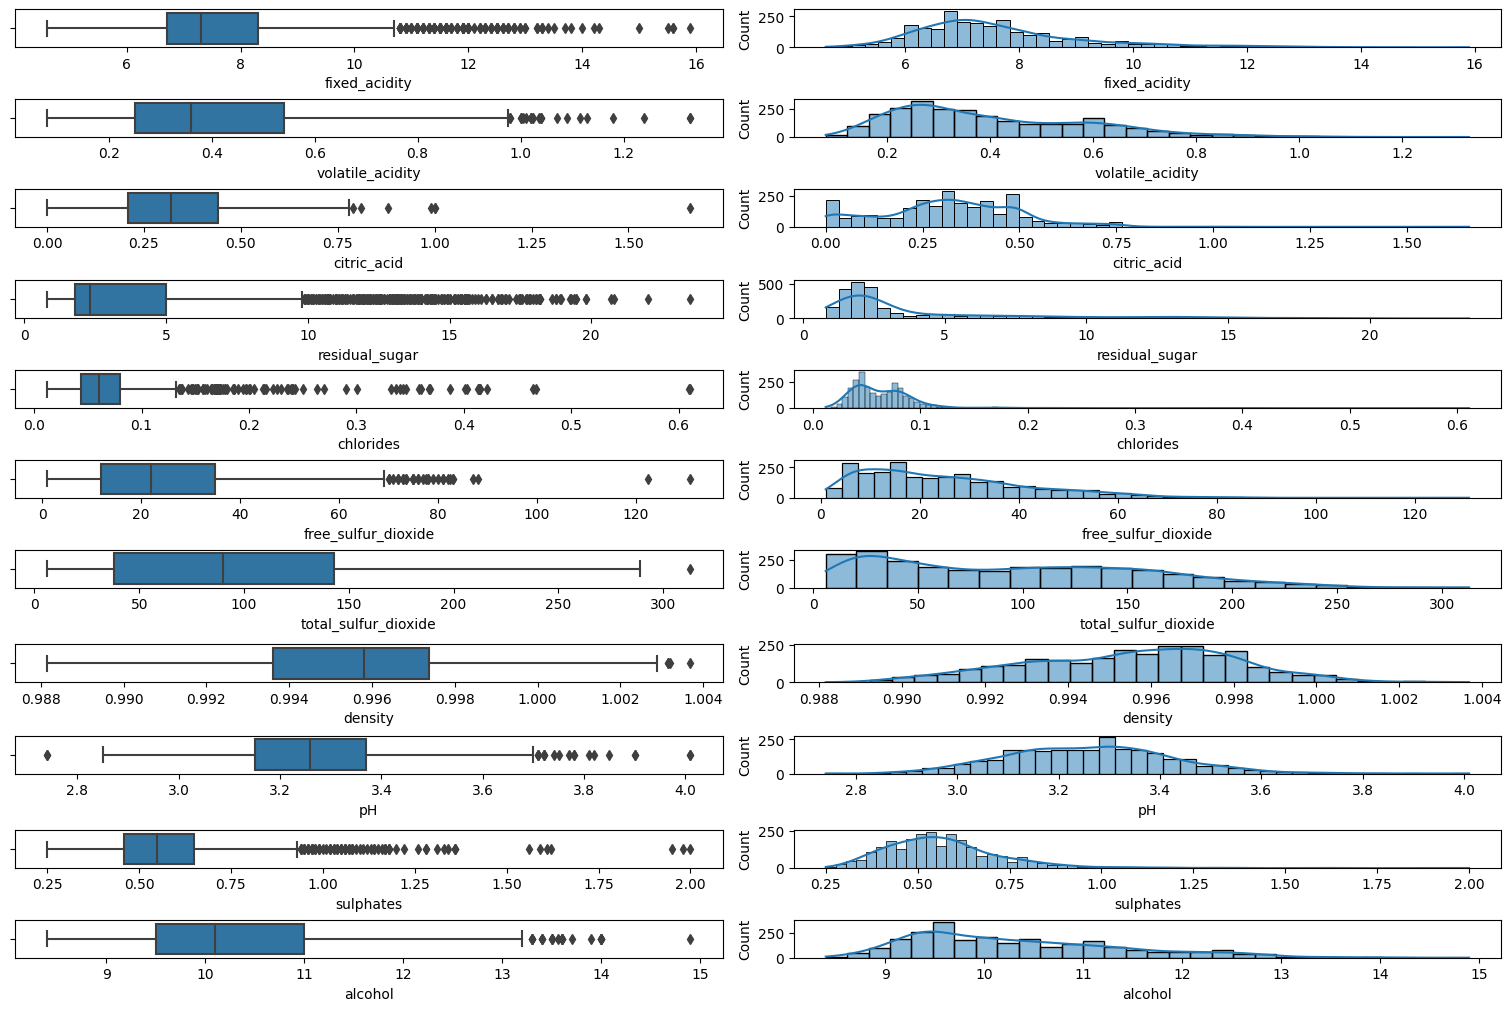

In [ ]:
cols = ["fixed_acidity","volatile_acidity","citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"]
fig, axes = plt.subplots(11, 2, figsize=(15, 10),constrained_layout = True)

for ax,col in zip(axes,cols):
    sns.boxplot(data=df3,x=col,ax=ax[0])
    sns.histplot(df3,x=col,ax=ax[1],kde=True)

Pada visualisasi distribusi diatas. Ditemukan bahwa persebaran datanya seimbang.

###**Multivariate Analysis**

Bagian ini menampilkan korelasi lebih dari satu variabel

In [ ]:
df3_corr = pd.get_dummies(df3).corr()

In [ ]:
px.imshow(df3_corr)

Pada data yang ditampilkan, apabila angka korelasinya mendekati 1 maka korelasinya akan semakin bagus

In [ ]:
fig = px.scatter_matrix(df3,dimensions=cols,color="fixed_acidity")
fig.update_layout(dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')
fig.show()

Pada pairplot dan heatmap diatas terlihat bahwa tidak terdapat korelasi yang kuat antar variabel yang ada. Salah satu korelasi yang cukup kuat ada pada korelasi antara spending score dengan umur. Yang menandakan adanya kemungkinan bahwa semakin muda seseorang maka spending scorenya semakin tinggi (Semakin muda semakin konsumtif)

##Modeling

####Preprocessing

In [ ]:
# Untuk Clustering
from sklearn.cluster import KMeans

# Untuk scalling dan normalisasi
from sklearn.preprocessing import StandardScaler

# Metric Pengukuran
# sumber : https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

import numpy as np

In [ ]:
df3

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.60,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.80,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
3241,7.3,0.19,0.49,15.55,0.058,50.0,134.0,0.9998,3.42,0.36,9.1
3242,8.1,0.30,0.49,12.30,0.049,50.0,144.0,0.9971,3.09,0.57,10.2
3244,7.5,0.24,0.49,9.40,0.048,50.0,149.0,0.9962,3.17,0.59,10.5
3246,7.8,0.21,0.49,1.20,0.036,20.0,99.0,0.9900,3.05,0.28,12.1


#####Encoding

In [ ]:
# PreProcessing
# Encoding DataTraining
X_train = pd.get_dummies(df3)

In [ ]:
X_train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

####Modeling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

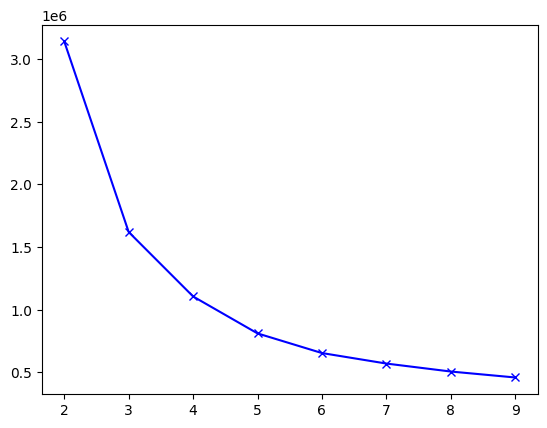

In [ ]:
sse = [] # Daftar SSE
K = range(2,10) # Banyak Cluster hingga 30
# Perulangan hingga 30 Cluster
for k in K:
    kmeans = KMeans(n_clusters= k,random_state=42).fit(X_train)
# Mendapatkan SSE dan append ke list sse
    sse.append(kmeans.inertia_)

# # Membuat plot K terhadap SSE
plt.plot(K,sse, "bx-")

In [ ]:
class Kmeans:
    """Algoritma K-Means"""

    def __init__(self, n_clusters):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))

        if 'species' in self.data.columns:
            self.data.drop('species', axis=1, inplace=True)

        # Randomly initialize centroids
        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters)
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nRandomly initiated centroids:")
            print(self.centroids)

        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        # Compare every data point in our dataset to each of the k-means and assign each point to closest cluster
        while not self.old_centroids.equals(self.centroids):
            
            if self.verbose:
                time.sleep(3)

            # Stash old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            # Iterate through each data point in the matrix
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                # Calculate the distance between the current point and each of the centroids
                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                # Assign this data point to a cluster
                self.clusters[row_i] = np.argmin(distances)

            # For each cluster extract the values which now belong to each cluster and calculate new k-means
            for cls in range(0, self.n_clusters):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    # Set the new k-mean to the mean value of the data points within this cluster
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()
                    
                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)

In [ ]:
kmeans = Kmeans(n_clusters = 4)
kmeans.train(df=X_train, verbose = False)

In [ ]:
X_train['cluster']=kmeans.clusters
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
all_df = pd.concat([X_train, centroids])

In [ ]:
all_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,cluster
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0.0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,1.0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0.0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,1.0
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3247,7.100000,0.300000,0.490000,1.600000,0.045000,31.000000,100.000000,0.994200,3.400000,0.590000,10.200000,1.0
0,8.376249,0.511860,0.268155,2.401223,0.084672,12.179918,30.359837,0.996508,3.309837,0.650234,10.553653,centroid
1,7.494100,0.404818,0.312254,2.945083,0.067197,22.764750,88.012859,0.994706,3.261694,0.558533,10.488250,centroid
2,6.980435,0.298742,0.374938,9.236801,0.053789,50.178571,203.495342,0.996315,3.183230,0.512764,9.660559,centroid


#####Plotting

In [ ]:
px.scatter_3d(all_df, x='volatile_acidity', y='citric_acid', z='sulphates', color='cluster',color_continuous_scale=['#ADFF2F', '#19A3E8', '#FF5A44', '#FFD326'])

####Analisis Cluster

In [ ]:
def plot_cluster(cluster_df):
    plot, ax = plt.subplots(3,4,figsize=(55,15),constrained_layout=True)
    cols = ['fixed_acidity', 'residual_sugar', 'chlorides']
    density_counts = cluster_df['density'].value_counts()
    sns.barplot(x=density_counts.index, y=density_counts.values, ax=ax[2][2])
    for i,col in enumerate(cols):
        sns.histplot(data=cluster_df, x=col, ax=ax[0][i], kde=True)
        sns.boxplot(data=cluster_df, x=col, ax=ax[1][i])
    sns.countplot(data=cluster_df, x="free_sulfur_dioxide", ax=ax[2][0])
    sns.countplot(data=cluster_df, x="total_sulfur_dioxide", ax=ax[2][1])
    sns.countplot(data=cluster_df, x="alcohol", ax=ax[2][3])

In [ ]:
cluster1 = all_df[all_df['cluster'] == 0]
cluster2 = all_df[all_df['cluster'] == 1]
cluster3 = all_df[all_df['cluster'] == 2]
cluster4 = all_df[all_df['cluster'] == 3]

#####Cluster 1

In [ ]:
cluster1.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,8.376249,0.511860,0.268155,2.401223,0.084672,12.179918,30.359837,0.996508,3.309837,0.650234,10.553653
std,1.814324,0.182856,0.203938,1.184883,0.045036,7.450345,14.079656,0.001940,0.155255,0.153782,1.038808
min,4.900000,0.120000,0.000000,0.800000,0.020000,1.000000,6.000000,0.988150,2.740000,0.250000,8.400000
25%,7.000000,0.380000,0.080000,1.800000,0.067000,6.000000,19.000000,0.995340,3.210000,0.550000,9.700000
50%,7.900000,0.500000,0.250000,2.100000,0.077000,10.000000,28.000000,0.996500,3.310000,0.620000,10.400000
75%,9.400000,0.635000,0.440000,2.500000,0.089000,16.000000,42.000000,0.997680,3.400000,0.730000,11.200000
max,15.600000,1.330000,0.760000,15.500000,0.611000,42.000000,61.000000,1.003200,4.010000,1.560000,14.000000


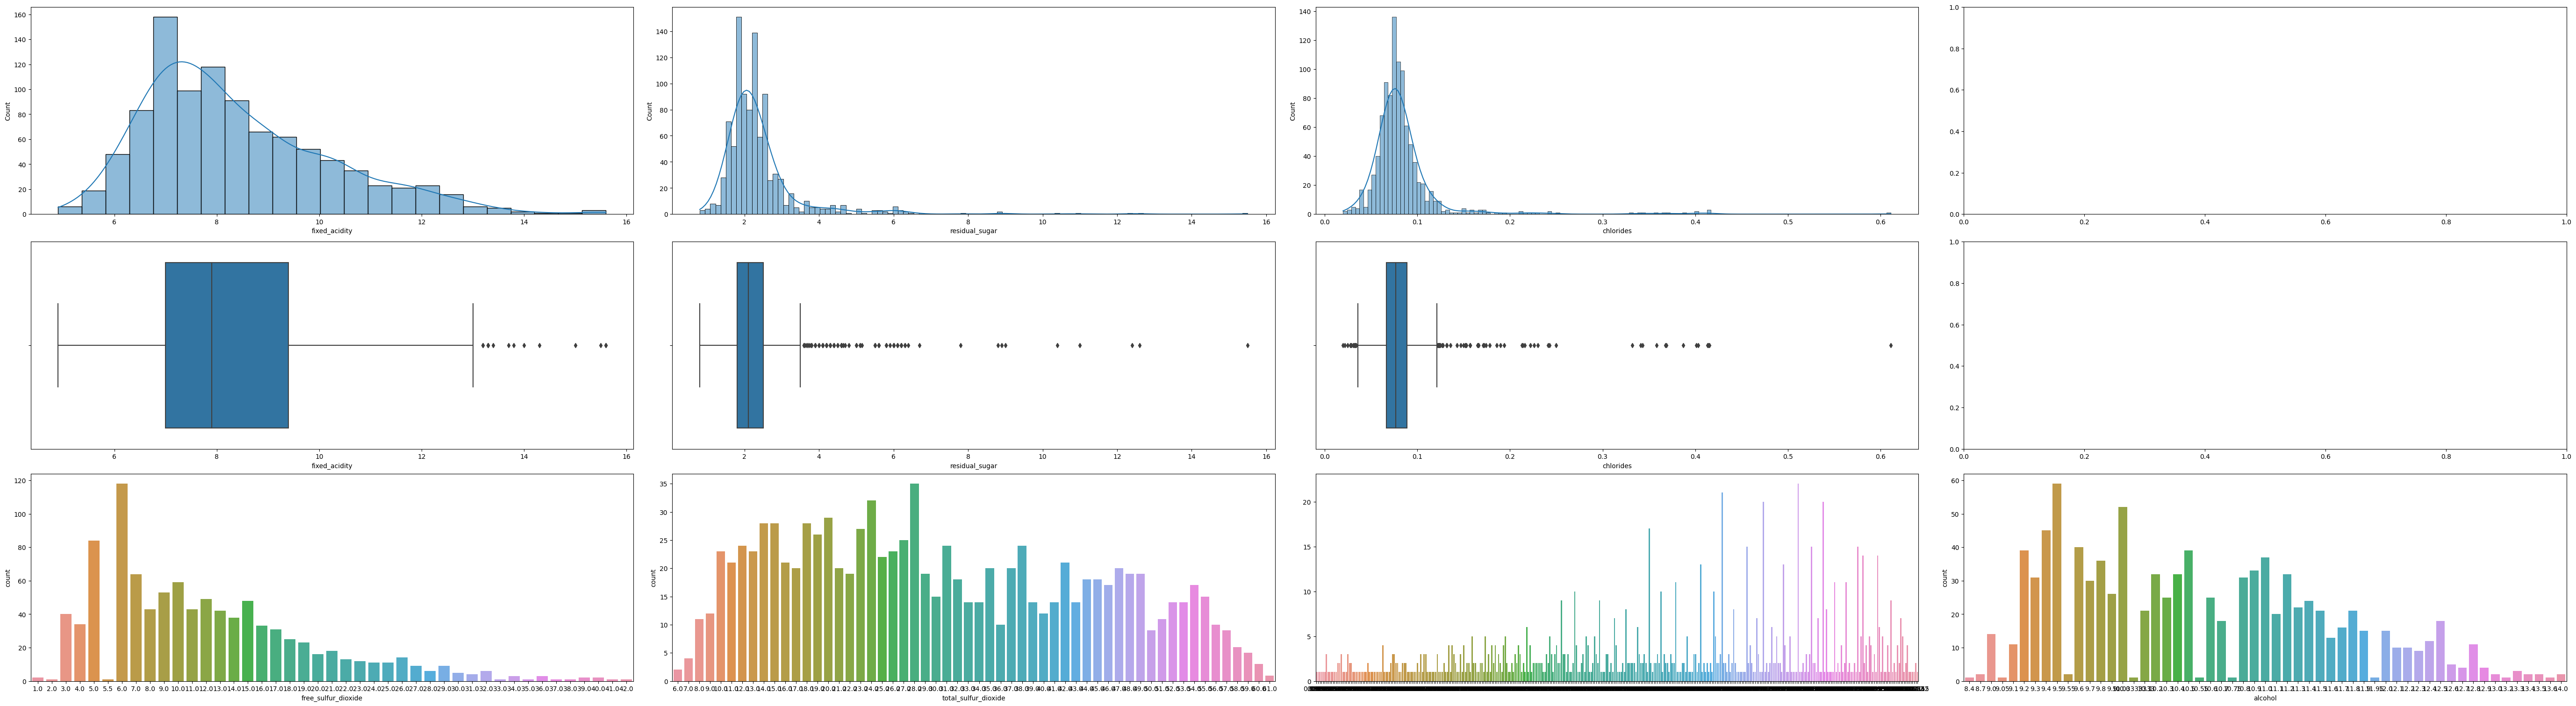

In [ ]:
# Menampilkan distribusi dari cluster1
plot_cluster(cluster1)

Ciri-ciri cluster 1:
1. mean dari masing-masing kolom

> fixed acidity: 8.376249

> volatile acidity: 0.511860

> citric acid: 0.268155

> residual sugar: 2.401223

> chlorides: 0.084672

> free sulfur dioxide: 12.179918

> total sulfur dioxide: 30.359837

> density: 0.996508

> pH: 3.309837

> sulphates: 0.650234

> alcohol: 10.553653

2. Setiap kolom memiliki jumlah data yang sama sebanyak 981
Rata-rata (mean) untuk setiap kolom dapat dilihat pada baris kedua pada tabel
Standar deviasi (std) untuk setiap kolom dapat dilihat pada baris ketiga pada tabel
Nilai minimum (min), 25% tertinggi, 50% tertinggi (median), 75% tertinggi, dan nilai maksimum (max) untuk setiap kolom juga dapat dilihat pada tabel

#####Cluster 2

In [ ]:
cluster2.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,7.494100,0.404818,0.312254,2.945083,0.067197,22.764750,88.012859,0.994706,3.261694,0.558533,10.488250
std,1.374479,0.199555,0.158014,2.343085,0.052284,9.508343,17.179760,0.002841,0.168284,0.179545,1.122629
min,4.600000,0.080000,0.000000,0.800000,0.012000,3.000000,55.000000,0.989200,2.740000,0.280000,8.500000
25%,6.600000,0.240000,0.220000,1.600000,0.039000,16.000000,73.000000,0.992300,3.150000,0.440000,9.500000
50%,7.300000,0.360000,0.320000,2.200000,0.054000,22.000000,89.000000,0.994800,3.260000,0.540000,10.200000
75%,8.200000,0.560000,0.400000,3.200000,0.082000,29.000000,102.000000,0.996900,3.360000,0.630000,11.200000
max,15.900000,1.070000,1.660000,15.400000,0.610000,55.000000,119.000000,1.003690,3.900000,2.000000,14.900000


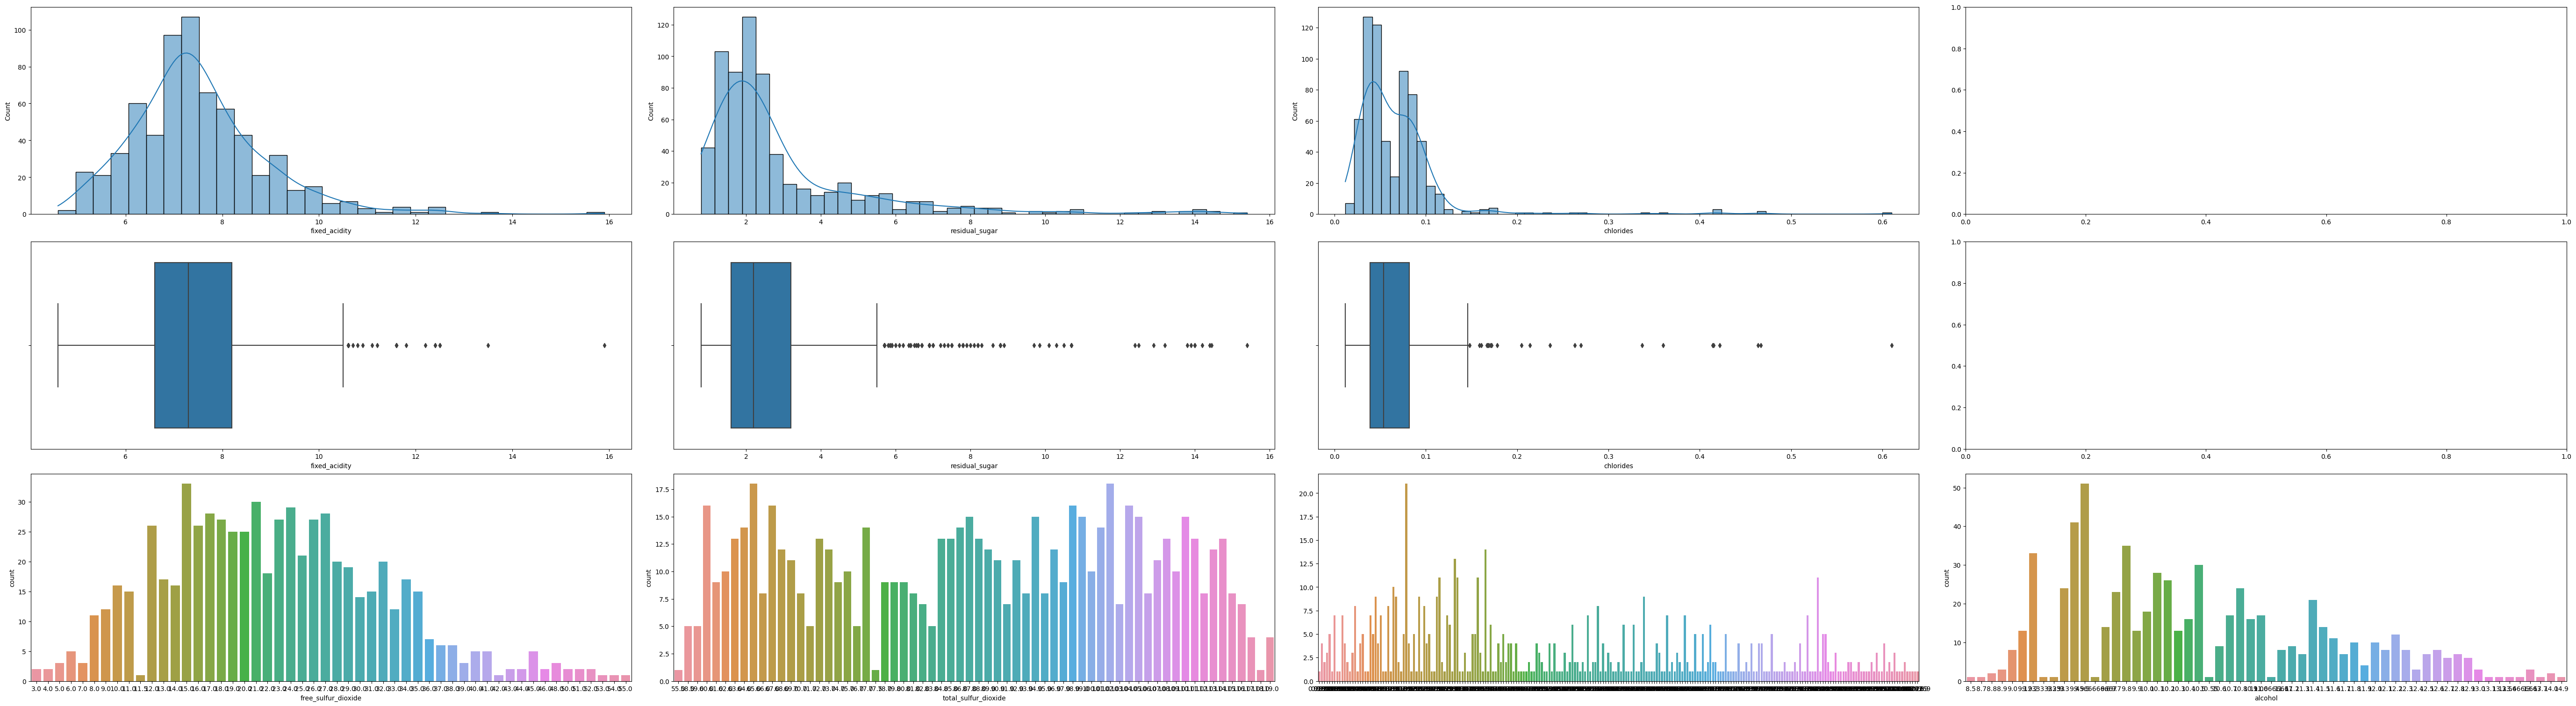

In [ ]:
# Menampilkan distribusi dari cluster1
plot_cluster(cluster2)

CIri-ciri Cluster 2
> Rata-rata fixed acidity adalah 7.49, volatile acidity adalah 0.40, dan citric acid adalah 0.31.

> Rata-rata residual sugar adalah 2.95, chlorides adalah 0.07, free sulfur dioxide adalah 22.76, dan total sulfur dioxide adalah 88.01.
Rata-rata density adalah 0.99, pH adalah 3.26, sulphates adalah 0.56, dan alcohol adalah 10.49.

> Variasi dalam setiap kolom berbeda-beda, menunjukkan bahwa setiap fitur memiliki distribusi yang berbeda-beda.
Mean dan median (50%) hampir sama, yang menunjukkan bahwa distribusi setiap kolom cenderung simetris.


#####Cluster 3

In [ ]:
cluster3.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,6.980435,0.298742,0.374938,9.236801,0.053789,50.178571,203.495342,0.996315,3.183230,0.512764,9.660559
std,0.769243,0.106825,0.135097,4.932604,0.036545,16.207473,23.587000,0.002201,0.149398,0.103723,0.744762
min,5.500000,0.115000,0.100000,0.800000,0.024000,8.000000,166.000000,0.989000,2.870000,0.250000,8.500000
25%,6.400000,0.240000,0.280000,5.900000,0.041000,40.250000,185.000000,0.994912,3.080000,0.440000,9.200000
50%,6.900000,0.280000,0.350000,8.700000,0.047000,51.000000,198.000000,0.996575,3.170000,0.500000,9.500000
75%,7.400000,0.327500,0.460000,13.100000,0.052000,60.000000,219.750000,0.997900,3.270000,0.580000,10.000000
max,10.700000,0.905000,1.000000,23.500000,0.346000,131.000000,313.000000,1.002400,3.720000,0.850000,12.900000


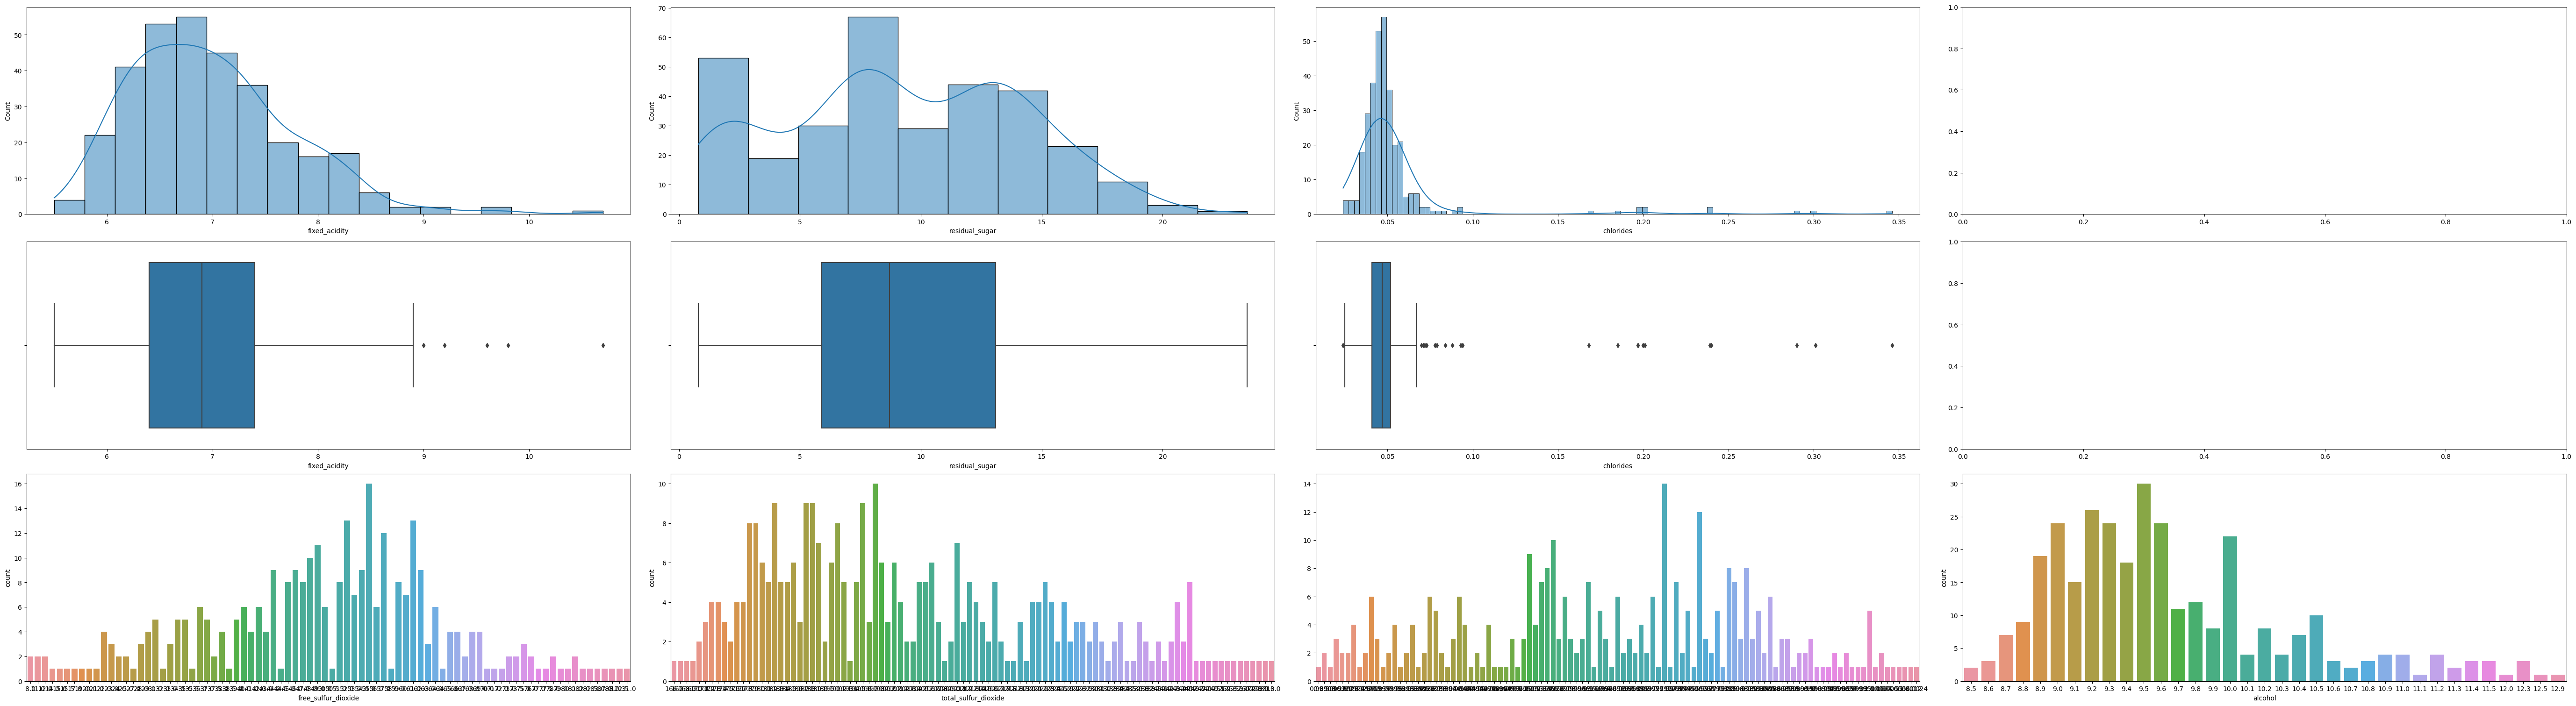

In [ ]:
# Menampilkan distribusi dari cluster1
plot_cluster(cluster3)

Ciri-ciri Cluster 3
1. fixed_acidity: rata-rata 6.98, standar deviasi 0.77, nilai minimum 5.5, nilai maksimum 10.7.
2. volatile_acidity: rata-rata 0.30, standar deviasi 0.11, nilai minimum 0.115, nilai maksimum 0.905.
3. citric_acid: rata-rata 0.37, standar deviasi 0.14, nilai minimum 0.1, nilai maksimum 1.0.
4. residual_sugar: rata-rata 9.24, standar deviasi 4.93, nilai minimum 0.8, nilai maksimum 23.5.
5. chlorides: rata-rata 0.05, standar deviasi 0.04, nilai minimum 0.024, nilai maksimum 0.346.
6. free_sulfur_dioxide: rata-rata 50.18, standar deviasi 16.21, nilai minimum 8.0, nilai maksimum 131.0.
7. total_sulfur_dioxide: rata-rata 203.50, standar deviasi 23.59, nilai minimum 166.0, nilai maksimum 313.0.
8. density: rata-rata 0.996315, standar deviasi 0.002201, nilai minimum 0.989, nilai maksimum 1.0024.
9. pH: rata-rata 3.18, standar deviasi 0.15, nilai minimum 2.87, nilai maksimum 3.72.
10. sulphates: rata-rata 0.51, standar deviasi 0.10, nilai minimum 0.25, nilai maksimum 0.85.
11. alcohol: rata-rata 9.66, standar deviasi 0.74, nilai minimum 8.5, nilai maksimum 12.9.

#####Cluster 4

In [ ]:
cluster4.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,7.108467,0.300248,0.365533,5.430219,0.050945,34.524088,143.599270,0.994573,3.218657,0.504730,10.221752
std,0.972029,0.138100,0.144860,4.631942,0.024328,13.023615,16.550395,0.002529,0.149111,0.158144,1.042437
min,4.800000,0.080000,0.000000,0.800000,0.021000,5.000000,113.000000,0.988600,2.850000,0.270000,8.600000
25%,6.400000,0.210000,0.270000,1.600000,0.038000,26.000000,130.000000,0.992800,3.120000,0.410000,9.400000
50%,7.000000,0.260000,0.340000,3.800000,0.044000,34.000000,143.000000,0.994300,3.210000,0.480000,10.000000
75%,7.600000,0.340000,0.460000,7.900000,0.054000,42.000000,158.000000,0.996500,3.320000,0.560000,10.800000
max,14.200000,1.240000,0.990000,22.000000,0.235000,83.000000,177.000000,1.001400,3.820000,1.980000,14.000000


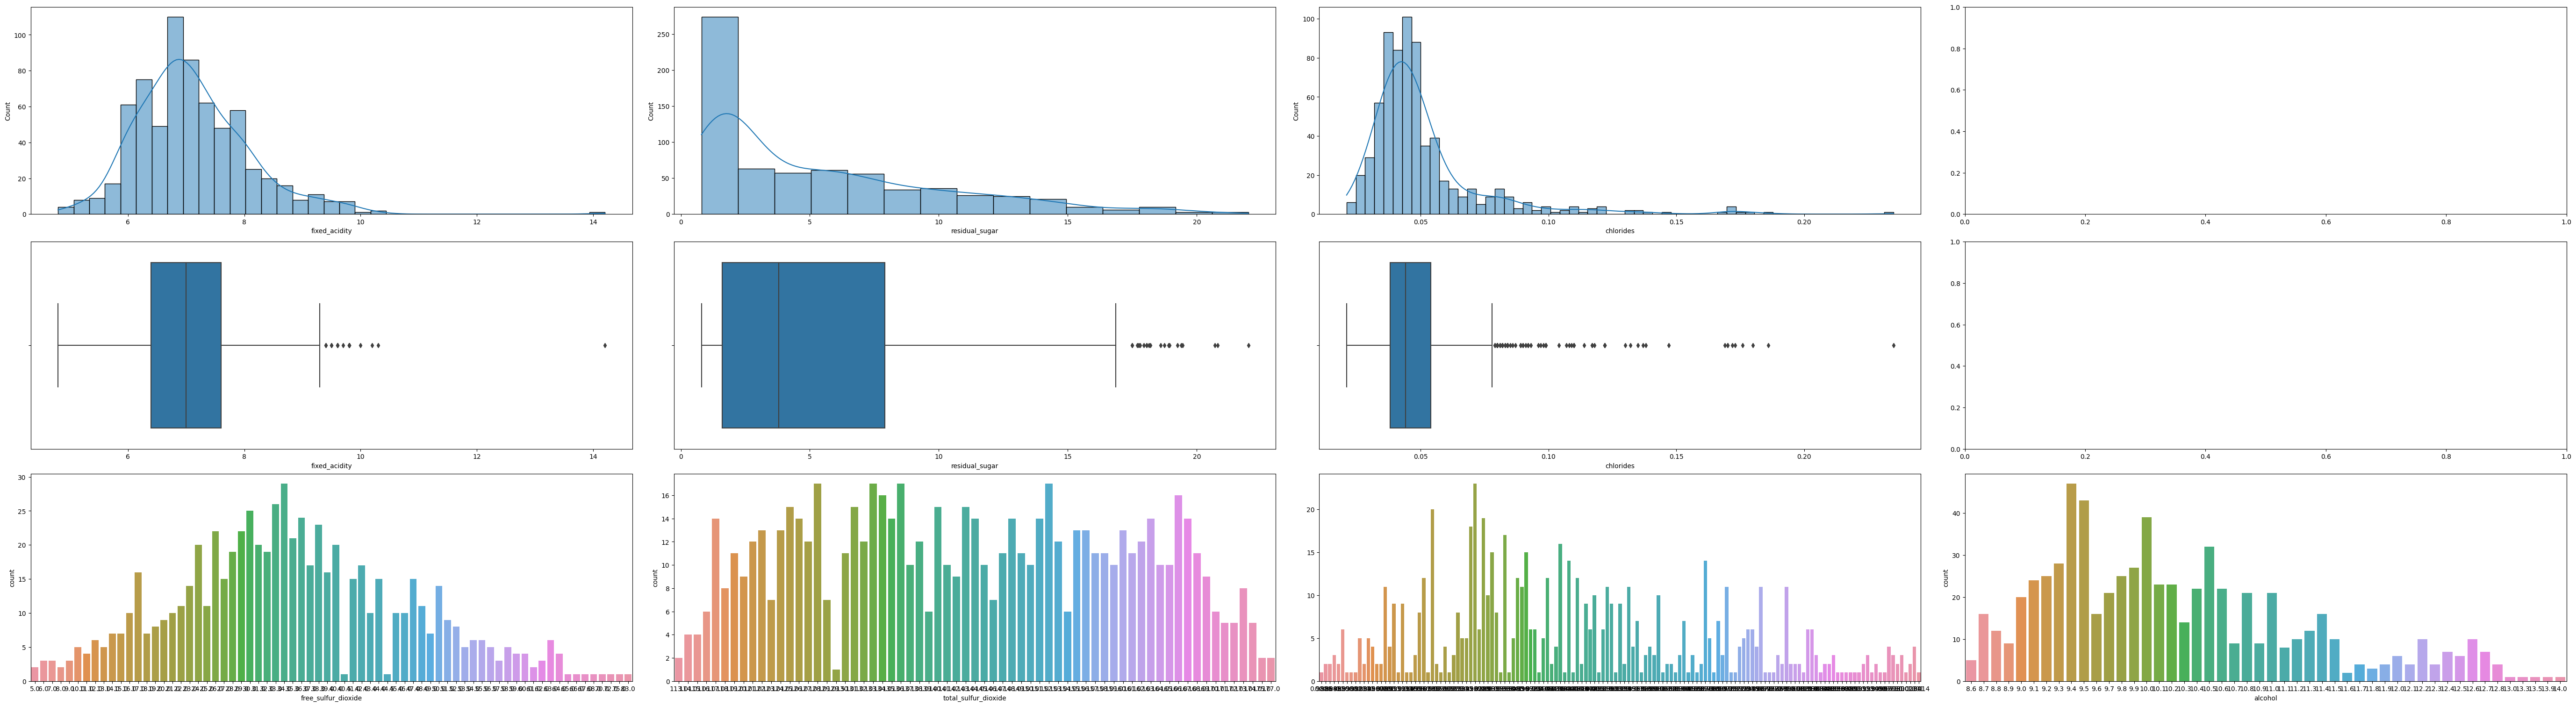

In [ ]:
# Menampilkan distribusi dari cluster1
plot_cluster(cluster4)

Ciri-ciri Cluster 4

> Dari data yang diberikan, terdapat 685 sampel anggur dengan rata-rata nilai fixed acidity sebesar 7.11, volatile acidity sebesar 0.30, citric acid sebesar 0.37, residual sugar sebesar 5.43, chlorides sebesar 0.05, free sulfur dioxide sebesar 34.52, total sulfur dioxide sebesar 143.60, density sebesar 0.99, pH sebesar 3.22, sulphates sebesar 0.50, dan alcohol sebesar 10.22.

##Evaluation

In [ ]:
# Menghitung nilai Silhouette Score
silhouette_avg = silhouette_score(X_train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Calinski-Harabasz Index
ch_score= calinski_harabasz_score(X_train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Davies-Bouldin Index
db_score= davies_bouldin_score(X_train.drop('cluster', axis=1), kmeans.clusters)

# Create dataframe for metrics and scores
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores = [silhouette_avg, ch_score, db_score]
df_scores = pd.DataFrame({'Metric': metrics, 'Score': scores})

# reset index dataframe
df_scores = df_scores.reset_index(drop=True)

# ubah nama axis pada index dan kolom
df_scores = df_scores.rename_axis('', axis=0).rename_axis('Metrics', axis=1)

# Display dataframe as table without index column
display(df_scores.style.hide_index())

<ipython-input-96-caf45928800c>:22: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`



Metric,Score
Silhouette Score,0.499614
Calinski-Harabasz Score,7964.436782
Davies-Bouldin Score,0.672362


1. Silhouette Score: skor ini digunakan untuk mengevaluasi kualitas pemisahan antar klaster. Nilai skor berkisar dari -1 sampai 1, dimana nilai 1 menunjukkan bahwa sampel sangat cocok dengan klaster tempat ia berada dan sangat berbeda dengan klaster lainnya, nilai 0 menunjukkan bahwa sampel berada di dekat batas antara dua klaster, sedangkan nilai negatif menunjukkan bahwa sampel salah ditempatkan dalam klaster yang salah. Dalam hal ini, Silhouette Score yang diperoleh sebesar 0.499614, yang menunjukkan bahwa pemisahan antar klaster relatif baik.

2. Calinski-Harabasz Score: skor ini digunakan untuk mengevaluasi seberapa baik kualitas pemisahan antar klaster, dengan memperhitungkan rasio variasi antar klaster dan dalam klaster. Semakin tinggi skor yang dihasilkan, semakin baik pemisahan antar klaster yang diperoleh. Dalam hal ini, Calinski-Harabasz Score yang diperoleh sebesar 7964.436782, yang menunjukkan bahwa pemisahan antar klaster cukup baik.

3. Davies-Bouldin Score: skor ini digunakan untuk mengevaluasi seberapa baik pemisahan antar klaster, dengan memperhitungkan rasio jarak antar klaster dan jarak dalam klaster. Semakin rendah skor yang dihasilkan, semakin baik pemisahan antar klaster yang diperoleh. Dalam hal ini, Davies-Bouldin Score yang diperoleh sebesar 0.672362, yang menunjukkan bahwa pemisahan antar klaster cukup baik.

##Deployment

In [ ]:
X_train.to_csv('wine_dataset_deployment.csv', index=False)